In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from joblib import dump, load
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\anjal\Downloads\project_risk_raw_dataset.csv")
df

,Project_ID,Project_Type,Team_Size,Project_Budget_USD,Estimated_Timeline_Months,Complexity_Score,Stakeholder_Count,Methodology_Used,Team_Experience_Level,Past_Similar_Projects,...,Industry_Volatility,Client_Experience_Level,Change_Control_Maturity,Risk_Management_Maturity,Team_Colocation,Documentation_Quality,Project_Start_Month,Current_Phase_Duration_Months,Seasonal_Risk_Factor,Risk_Level
0,PROJ_0001,Construction,32,1526276.55,32,9.70,16,Waterfall,Senior,3,...,Extreme,First-time,Basic,Basic,Fully Colocated,Good,10,5,1.0,High
1,PROJ_0002,Manufacturing,2,390790.15,9,2.72,9,Kanban,Mixed,0,...,Stable,Occasional,Advanced,Formal,Fully Remote,Poor,9,3,1.0,Low
2,PROJ_0003,Manufacturing,2,246674.76,6,2.04,7,Agile,Mixed,1,...,Stable,Regular,NaN,NaN,Hybrid,Good,5,1,1.0,Medium
3,PROJ_0004,IT,12,1427830.63,17,7.54,16,Scrum,Mixed,0,...,Extreme,Strategic,Formal,Basic,Hybrid,Basic,12,6,1.1,High
4,PROJ_0005,Construction,24,1696746.64,24,6.68,17,Hybrid,Junior,0,...,Moderate,Occasional,Basic,NaN,Partially Colocated,Basic,9,6,1.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,PROJ_3996,IT,9,731548.97,14,5.40,9,Agile,Senior,4,...,Moderate,Occasional,NaN,NaN,Hybrid,Basic,10,1,1.1,High
3996,PROJ_3997,Healthcare,9,492981.40,9,2.69,8,Waterfall,Senior,5,...,Stable,Occasional,NaN,Basic,Hybrid,Basic,9,1,1.0,Medium
3997,PROJ_3998,IT,12,1097040.65,24,8.82,10,Kanban,Junior,2,...,Moderate,Regular,NaN,Basic,Fully Remote,Basic,3,4,1.0,High
3998,PROJ_3999,R&D,26,2900977.55,28,10.00,26,Scrum,Junior,1,...,High,Strategic,Basic,Formal,Fully Remote,Good,1,10,1.0,High


In [3]:
df.dropna

<bound method DataFrame.dropna of      Project_ID   Project_Type  Team_Size  Project_Budget_USD  \
0     PROJ_0001   Construction         32          1526276.55   
1     PROJ_0002  Manufacturing          2           390790.15   
2     PROJ_0003  Manufacturing          2           246674.76   
3     PROJ_0004             IT         12          1427830.63   
4     PROJ_0005   Construction         24          1696746.64   
...         ...            ...        ...                 ...   
3995  PROJ_3996             IT          9           731548.97   
3996  PROJ_3997     Healthcare          9           492981.40   
3997  PROJ_3998             IT         12          1097040.65   
3998  PROJ_3999            R&D         26          2900977.55   
3999  PROJ_4000   Construction         33          1627904.31   

      Estimated_Timeline_Months  Complexity_Score  Stakeholder_Count  \
0                            32              9.70                 16   
1                             9          

In [4]:
df.head()

,Project_ID,Project_Type,Team_Size,Project_Budget_USD,Estimated_Timeline_Months,Complexity_Score,Stakeholder_Count,Methodology_Used,Team_Experience_Level,Past_Similar_Projects,...,Industry_Volatility,Client_Experience_Level,Change_Control_Maturity,Risk_Management_Maturity,Team_Colocation,Documentation_Quality,Project_Start_Month,Current_Phase_Duration_Months,Seasonal_Risk_Factor,Risk_Level
0,PROJ_0001,Construction,32,1526276.55,32,9.70,16,Waterfall,Senior,3,...,Extreme,First-time,Basic,Basic,Fully Colocated,Good,10,5,1.0,High
1,PROJ_0002,Manufacturing,2,390790.15,9,2.72,9,Kanban,Mixed,0,...,Stable,Occasional,Advanced,Formal,Fully Remote,Poor,9,3,1.0,Low
2,PROJ_0003,Manufacturing,2,246674.76,6,2.04,7,Agile,Mixed,1,...,Stable,Regular,NaN,NaN,Hybrid,Good,5,1,1.0,Medium
3,PROJ_0004,IT,12,1427830.63,17,7.54,16,Scrum,Mixed,0,...,Extreme,Strategic,Formal,Basic,Hybrid,Basic,12,6,1.1,High
4,PROJ_0005,Construction,24,1696746.64,24,6.68,17,Hybrid,Junior,0,...,Moderate,Occasional,Basic,NaN,Partially Colocated,Basic,9,6,1.0,High


In [5]:
df.tail()

,Project_ID,Project_Type,Team_Size,Project_Budget_USD,Estimated_Timeline_Months,Complexity_Score,Stakeholder_Count,Methodology_Used,Team_Experience_Level,Past_Similar_Projects,...,Industry_Volatility,Client_Experience_Level,Change_Control_Maturity,Risk_Management_Maturity,Team_Colocation,Documentation_Quality,Project_Start_Month,Current_Phase_Duration_Months,Seasonal_Risk_Factor,Risk_Level
3995,PROJ_3996,IT,9,731548.97,14,5.40,9,Agile,Senior,4,...,Moderate,Occasional,NaN,NaN,Hybrid,Basic,10,1,1.1,High
3996,PROJ_3997,Healthcare,9,492981.40,9,2.69,8,Waterfall,Senior,5,...,Stable,Occasional,NaN,Basic,Hybrid,Basic,9,1,1.0,Medium
3997,PROJ_3998,IT,12,1097040.65,24,8.82,10,Kanban,Junior,2,...,Moderate,Regular,NaN,Basic,Fully Remote,Basic,3,4,1.0,High
3998,PROJ_3999,R&D,26,2900977.55,28,10.00,26,Scrum,Junior,1,...,High,Strategic,Basic,Formal,Fully Remote,Good,1,10,1.0,High
3999,PROJ_4000,Construction,33,1627904.31,28,7.04,15,Waterfall,Senior,1,...,High,Occasional,Formal,Formal,Partially Colocated,Basic,5,1,1.0,Medium


In [6]:
df.isna().sum()

Project_ID                            0
Project_Type                          0
Team_Size                             0
Project_Budget_USD                    0
Estimated_Timeline_Months             0
Complexity_Score                      0
Stakeholder_Count                     0
Methodology_Used                      0
Team_Experience_Level                 0
Past_Similar_Projects                 0
External_Dependencies_Count           0
Change_Request_Frequency              0
Project_Phase                         0
Requirement_Stability                 0
Team_Turnover_Rate                    0
Vendor_Reliability_Score              0
Historical_Risk_Incidents             0
Communication_Frequency               0
Regulatory_Compliance_Level           0
Technology_Familiarity                0
Geographical_Distribution             0
Stakeholder_Engagement_Level          0
Schedule_Pressure                     0
Budget_Utilization_Rate               0
Executive_Sponsorship                 0


In [7]:
df.duplicated().any()

np.False_

In [8]:
df.shape

(4000, 51)

In [9]:
df.size

204000

In [10]:
df.columns

Index(['Project_ID', 'Project_Type', 'Team_Size', 'Project_Budget_USD',
       'Estimated_Timeline_Months', 'Complexity_Score', 'Stakeholder_Count',
       'Methodology_Used', 'Team_Experience_Level', 'Past_Similar_Projects',
       'External_Dependencies_Count', 'Change_Request_Frequency',
       'Project_Phase', 'Requirement_Stability', 'Team_Turnover_Rate',
       'Vendor_Reliability_Score', 'Historical_Risk_Incidents',
       'Communication_Frequency', 'Regulatory_Compliance_Level',
       'Technology_Familiarity', 'Geographical_Distribution',
       'Stakeholder_Engagement_Level', 'Schedule_Pressure',
       'Budget_Utilization_Rate', 'Executive_Sponsorship', 'Funding_Source',
       'Market_Volatility', 'Integration_Complexity', 'Resource_Availability',
       'Priority_Level', 'Organizational_Change_Frequency',
       'Cross_Functional_Dependencies', 'Previous_Delivery_Success_Rate',
       'Technical_Debt_Level', 'Project_Manager_Experience',
       'Org_Process_Maturity', 'Dat

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Project_ID                       4000 non-null   object 
 1   Project_Type                     4000 non-null   object 
 2   Team_Size                        4000 non-null   int64  
 3   Project_Budget_USD               4000 non-null   float64
 4   Estimated_Timeline_Months        4000 non-null   int64  
 5   Complexity_Score                 4000 non-null   float64
 6   Stakeholder_Count                4000 non-null   int64  
 7   Methodology_Used                 4000 non-null   object 
 8   Team_Experience_Level            4000 non-null   object 
 9   Past_Similar_Projects            4000 non-null   int64  
 10  External_Dependencies_Count      4000 non-null   int64  
 11  Change_Request_Frequency         4000 non-null   float64
 12  Project_Phase       

In [12]:
df.describe()

,Team_Size,Project_Budget_USD,Estimated_Timeline_Months,Complexity_Score,Stakeholder_Count,Past_Similar_Projects,External_Dependencies_Count,Change_Request_Frequency,Team_Turnover_Rate,Vendor_Reliability_Score,...,Market_Volatility,Integration_Complexity,Resource_Availability,Organizational_Change_Frequency,Cross_Functional_Dependencies,Previous_Delivery_Success_Rate,Technical_Debt_Level,Project_Start_Month,Current_Phase_Duration_Months,Seasonal_Risk_Factor
count,4000.000000,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000
mean,15.388250,1.143032e+06,17.147750,6.192525,11.130500,1.973750,3.127750,1.638080,0.292725,0.712087,...,0.49716,5.573585,0.651695,1.212215,3.549250,0.750437,0.17544,6.492500,4.074500,1.011325
std,9.220969,5.908781e+05,6.926609,2.212538,4.425875,1.750093,1.609216,1.170451,0.166546,0.163418,...,0.28702,2.606654,0.201163,0.969191,2.320004,0.143712,0.29682,3.476416,2.883926,0.031694
min,2.000000,1.593555e+05,2.000000,1.620000,2.000000,0.000000,0.000000,0.010000,0.000000,0.090000,...,0.00000,1.000000,0.300000,0.000000,0.000000,0.150000,0.00000,1.000000,1.000000,1.000000
25%,9.000000,6.925329e+05,12.000000,4.460000,8.000000,1.000000,2.000000,0.760000,0.160000,0.600000,...,0.25000,3.317500,0.480000,0.500000,2.000000,0.660000,0.00000,4.000000,2.000000,1.000000
50%,13.000000,1.007472e+06,17.000000,6.015000,10.000000,2.000000,3.000000,1.370000,0.270000,0.730000,...,0.50000,5.600000,0.650000,0.960000,4.000000,0.770000,0.00000,7.000000,3.000000,1.000000
75%,20.000000,1.475870e+06,22.000000,7.862500,14.000000,3.000000,4.000000,2.230000,0.400000,0.840000,...,0.74000,7.860000,0.820000,1.660000,6.000000,0.860000,0.28000,10.000000,6.000000,1.000000
max,50.000000,3.768354e+06,36.000000,10.000000,29.000000,10.000000,7.000000,8.840000,0.850000,1.000000,...,1.00000,10.000000,1.000000,8.230000,7.000000,0.990000,1.00000,12.000000,17.000000,1.100000


In [13]:
df['Risk_Level'].value_counts()

Risk_Level
Medium      1396
High        1036
Low          806
Critical     762
Name: count, dtype: int64

HANDLING MISSING VALUES


In [14]:
df.drop(['Project_ID','Current_Phase_Duration_Months','Project_Start_Month',
    'Documentation_Quality','Team_Colocation','Key_Stakeholder_Availability','Contract_Type',
    'Funding_Source','Executive_Sponsorship','Change_Control_Maturity','Risk_Management_Maturity','Org_Process_Maturity'
],axis=1,inplace=True)


VISUALIZING USING MATPLOTLIB

Text(0.5, 1.0, 'Count of Each Risk Level')

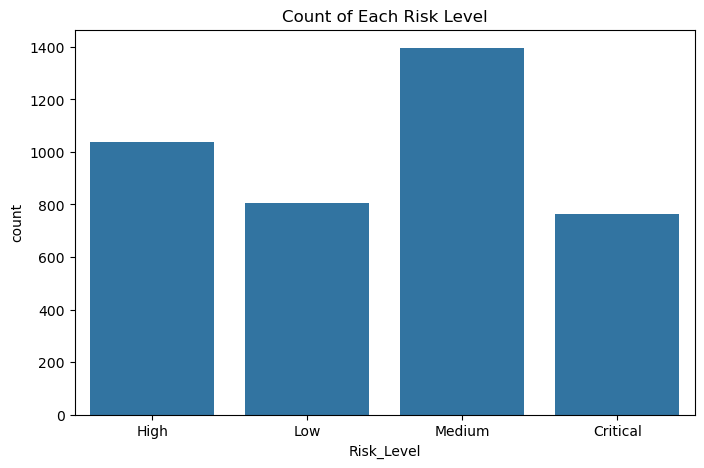

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='Risk_Level', data=df)
plt.title("Count of Each Risk Level")

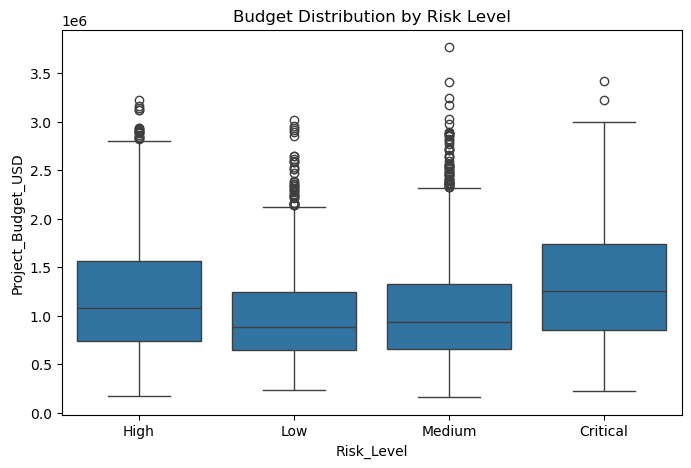

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Risk_Level', y='Project_Budget_USD', data=df)
plt.title("Budget Distribution by Risk Level")
plt.show()

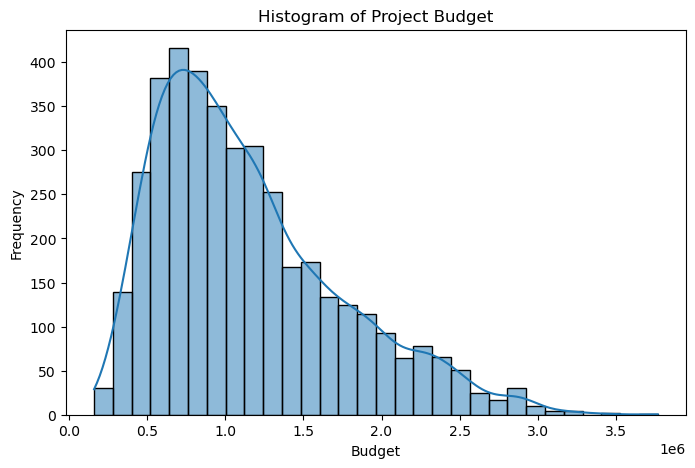

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df['Project_Budget_USD'], bins=30, kde=True)
plt.title("Histogram of Project Budget")
plt.xlabel("Budget")
plt.ylabel("Frequency")
plt.show()


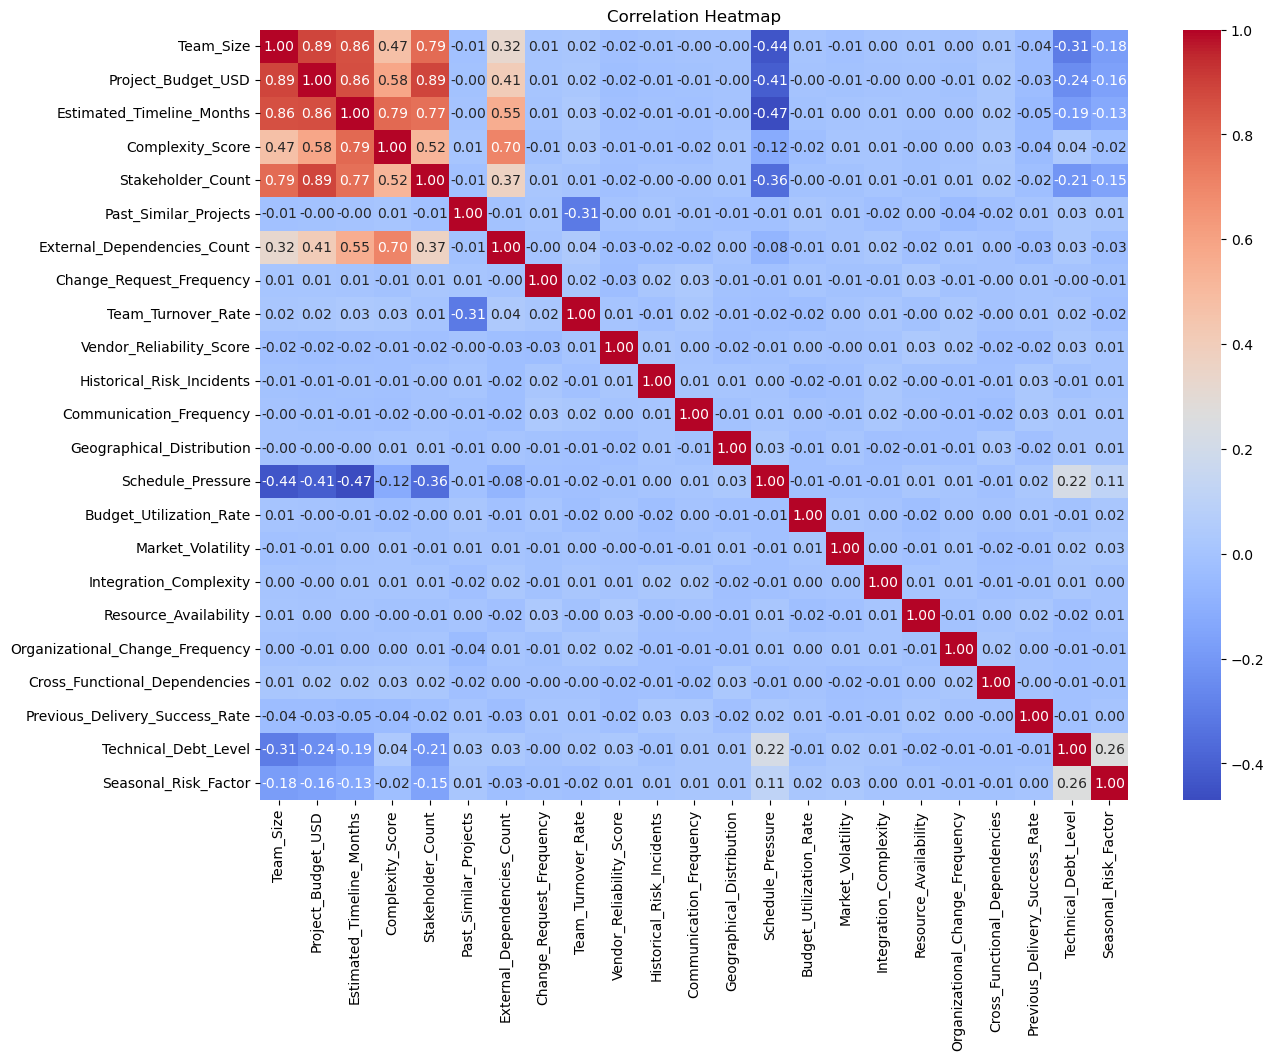

In [18]:
plt.figure(figsize=(14,10))
corr = df.corr(numeric_only=True)

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

CONVERTING CATEGORICAL VALUES INTO NUMERICAL VALUES

In [19]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(categorical_columns)

['Project_Type', 'Methodology_Used', 'Team_Experience_Level', 'Project_Phase', 'Requirement_Stability', 'Regulatory_Compliance_Level', 'Technology_Familiarity', 'Stakeholder_Engagement_Level', 'Priority_Level', 'Project_Manager_Experience', 'Data_Security_Requirements', 'Tech_Environment_Stability', 'Resource_Contention_Level', 'Industry_Volatility', 'Client_Experience_Level', 'Risk_Level']


In [20]:
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [21]:
df

,Project_Type,Team_Size,Project_Budget_USD,Estimated_Timeline_Months,Complexity_Score,Stakeholder_Count,Methodology_Used,Team_Experience_Level,Past_Similar_Projects,External_Dependencies_Count,...,Previous_Delivery_Success_Rate,Technical_Debt_Level,Project_Manager_Experience,Data_Security_Requirements,Tech_Environment_Stability,Resource_Contention_Level,Industry_Volatility,Client_Experience_Level,Seasonal_Risk_Factor,Risk_Level
0,0,32,1526276.55,32,9.70,16,4,3,3,3,...,0.80,0.00,2,2,3,0,0,0,1.0,1
1,3,2,390790.15,9,2.72,9,2,2,0,2,...,0.73,0.00,2,1,3,1,3,1,1.0,2
2,3,2,246674.76,6,2.04,7,0,2,1,0,...,0.91,0.00,2,2,3,0,3,2,1.0,3
3,2,12,1427830.63,17,7.54,16,3,2,0,5,...,0.71,0.43,0,3,1,0,0,3,1.1,1
4,0,24,1696746.64,24,6.68,17,1,1,0,2,...,0.83,0.00,0,2,3,0,2,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2,9,731548.97,14,5.40,9,0,3,4,3,...,0.75,0.96,0,0,0,2,2,1,1.1,1
3996,1,9,492981.40,9,2.69,8,4,3,5,3,...,0.88,0.00,2,3,3,2,3,1,1.0,3
3997,2,12,1097040.65,24,8.82,10,2,1,2,4,...,0.98,0.86,2,0,0,1,2,2,1.0,1
3998,5,26,2900977.55,28,10.00,26,3,1,1,6,...,0.71,0.00,1,0,3,2,1,3,1.0,1


SELECTING TARGET VALUES

In [22]:
x = df.drop(['Risk_Level'], axis=1)
y = df['Risk_Level']

In [23]:
print(type(x))
print(x.columns)
print(len(x.columns))


<class 'pandas.core.frame.DataFrame'>
Index(['Project_Type', 'Team_Size', 'Project_Budget_USD',
       'Estimated_Timeline_Months', 'Complexity_Score', 'Stakeholder_Count',
       'Methodology_Used', 'Team_Experience_Level', 'Past_Similar_Projects',
       'External_Dependencies_Count', 'Change_Request_Frequency',
       'Project_Phase', 'Requirement_Stability', 'Team_Turnover_Rate',
       'Vendor_Reliability_Score', 'Historical_Risk_Incidents',
       'Communication_Frequency', 'Regulatory_Compliance_Level',
       'Technology_Familiarity', 'Geographical_Distribution',
       'Stakeholder_Engagement_Level', 'Schedule_Pressure',
       'Budget_Utilization_Rate', 'Market_Volatility',
       'Integration_Complexity', 'Resource_Availability', 'Priority_Level',
       'Organizational_Change_Frequency', 'Cross_Functional_Dependencies',
       'Previous_Delivery_Success_Rate', 'Technical_Debt_Level',
       'Project_Manager_Experience', 'Data_Security_Requirements',
       'Tech_Environment

In [24]:
x

,Project_Type,Team_Size,Project_Budget_USD,Estimated_Timeline_Months,Complexity_Score,Stakeholder_Count,Methodology_Used,Team_Experience_Level,Past_Similar_Projects,External_Dependencies_Count,...,Cross_Functional_Dependencies,Previous_Delivery_Success_Rate,Technical_Debt_Level,Project_Manager_Experience,Data_Security_Requirements,Tech_Environment_Stability,Resource_Contention_Level,Industry_Volatility,Client_Experience_Level,Seasonal_Risk_Factor
0,0,32,1526276.55,32,9.70,16,4,3,3,3,...,6,0.80,0.00,2,2,3,0,0,0,1.0
1,3,2,390790.15,9,2.72,9,2,2,0,2,...,3,0.73,0.00,2,1,3,1,3,1,1.0
2,3,2,246674.76,6,2.04,7,0,2,1,0,...,2,0.91,0.00,2,2,3,0,3,2,1.0
3,2,12,1427830.63,17,7.54,16,3,2,0,5,...,5,0.71,0.43,0,3,1,0,0,3,1.1
4,0,24,1696746.64,24,6.68,17,1,1,0,2,...,6,0.83,0.00,0,2,3,0,2,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2,9,731548.97,14,5.40,9,0,3,4,3,...,6,0.75,0.96,0,0,0,2,2,1,1.1
3996,1,9,492981.40,9,2.69,8,4,3,5,3,...,3,0.88,0.00,2,3,3,2,3,1,1.0
3997,2,12,1097040.65,24,8.82,10,2,1,2,4,...,7,0.98,0.86,2,0,0,1,2,2,1.0
3998,5,26,2900977.55,28,10.00,26,3,1,1,6,...,7,0.71,0.00,1,0,3,2,1,3,1.0


In [25]:
y

0       1
1       2
2       3
3       1
4       1
       ..
3995    1
3996    3
3997    1
3998    1
3999    3
Name: Risk_Level, Length: 4000, dtype: int64

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler


In [28]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [29]:
model1=LogisticRegression()
model1.fit(xtrain,ytrain)

LogisticRegression()

In [30]:
ypred1=model1.predict(xtest)
ypred1

array([3, 3, 0, ..., 3, 2, 0])

In [31]:
ytest

555     3
3491    3
527     0
3925    3
2989    0
       ..
3856    3
226     2
1612    3
535     2
3848    0
Name: Risk_Level, Length: 1200, dtype: int64

In [32]:
logistictest=model1.score(xtest,ytest)*100
logistictrain=model1.score(xtrain,ytrain)*100
logistictest
logistictrain

50.21428571428571

DECISION TREE CLASSIFIER


In [33]:
model2=DecisionTreeClassifier()
model2.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [34]:
treetest=model2.score(xtest,ytest)*100
treetrain=model2.score(xtrain,ytrain)*100
treetest
treetrain

100.0

In [35]:
ypred2=model2.predict(xtest)
ypred2

array([3, 3, 3, ..., 1, 2, 1])

RANDOM FOREST CLASSIFIER

In [36]:
model3=RandomForestClassifier()
model3.fit(xtrain,ytrain)

RandomForestClassifier()

In [37]:
ypred3=model3.predict(xtest)
ypred3

array([3, 3, 3, ..., 3, 2, 0])

In [38]:
foresttest=model3.score(xtest,ytest)*100
foresttrain=(model3.score(xtrain,ytrain)*100)
foresttest
foresttrain

100.0

ADABOOST CLASSIFIER

In [39]:
model4 = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42)
model4.fit(xtrain,ytrain)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

In [40]:
ypred4=model3.predict(xtest)
ypred4

array([3, 3, 3, ..., 3, 2, 0])

In [41]:
Adaboosttest=model4.score(xtest,ytest)*100
Adaboosttrain=model4.score(xtrain,ytrain)*100
Adaboosttest
Adaboosttrain

48.642857142857146

GRADIENT BOOST CLASSIFIER

In [42]:
model5=GradientBoostingClassifier(n_estimators=250,random_state=1)
model5.fit(xtrain,ytrain)

GradientBoostingClassifier(n_estimators=250, random_state=1)

In [43]:
ypred5=model5.predict(xtest)
ypred5

array([3, 2, 0, ..., 3, 2, 0])

In [44]:
gradienttest=model5.score(xtest,ytest)*100
gradienttrain=model5.score(xtrain,ytrain)*100
gradienttest
gradienttrain

93.89285714285714

In [45]:
row = x.iloc[0]                   # 1 row → 53 columns
scaled_row = scaler.transform([row])
model5.predict(scaled_row)


array([0])

Kneighbors classifier

In [46]:
model6=KNeighborsClassifier(n_neighbors=5)
model6.fit(xtrain,ytrain)

KNeighborsClassifier()

In [47]:
ypred6=model6.predict(xtest)
ypred6

array([2, 2, 0, ..., 2, 2, 0])

In [48]:
neighbortest=model6.score(xtest,ytest)*100
neighbortrain=(model6.score(xtrain,ytrain)*100)
neighbortest
neighbortrain


59.392857142857146

In [49]:
cr5=classification_report(ytest,ypred5)
print(cr5)

              precision    recall  f1-score   support

           0       0.69      0.55      0.61       249
           1       0.38      0.39      0.38       288
           2       0.63      0.53      0.57       239
           3       0.50      0.60      0.55       424

    accuracy                           0.52      1200
   macro avg       0.55      0.52      0.53      1200
weighted avg       0.54      0.52      0.53      1200



In [50]:
cm5=confusion_matrix(ytest,ypred5)
cm5

array([[136,  88,   1,  24],
       [ 43, 112,   8, 125],
       [  0,  12, 126, 101],
       [ 17,  86,  66, 255]])

In [51]:
score5=accuracy_score(ytest,ypred5)
score5

0.5241666666666667

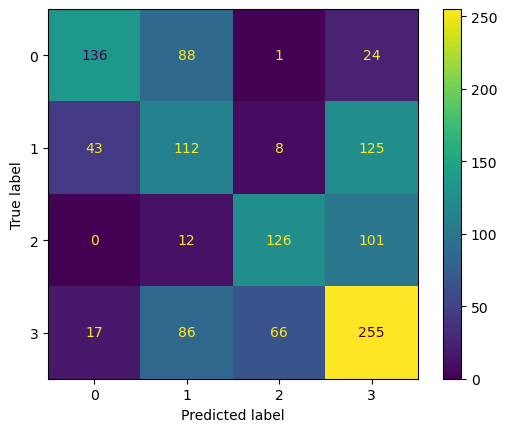

In [52]:
cd=ConfusionMatrixDisplay(cm5)
cd.plot()

In [53]:
score = pd.DataFrame({
    'Model' : [
        'LogisticRegression',
        'DecisionTreeClassifier',
        'RandomForestClassifier',
        'KNeighborClassifier',
        'AdaBoostClassifier',
        'GradientBoostClassifier'
    ],

    'TrainingScores' : [
        logistictrain,
        treetrain,
        foresttrain,
        neighbortrain,
        Adaboosttrain,
        gradienttrain
    ],

    'TestingScore' : [
        logistictest,
        treetest,
        foresttest,
        neighbortest,
        Adaboosttest,
        gradienttest]
})

score

,Model,TrainingScores,TestingScore
0,LogisticRegression,50.214286,48.666667
1,DecisionTreeClassifier,100.000000,36.750000
2,RandomForestClassifier,100.000000,45.833333
3,KNeighborClassifier,59.392857,39.250000
4,AdaBoostClassifier,48.642857,47.083333
5,GradientBoostClassifier,93.892857,52.416667


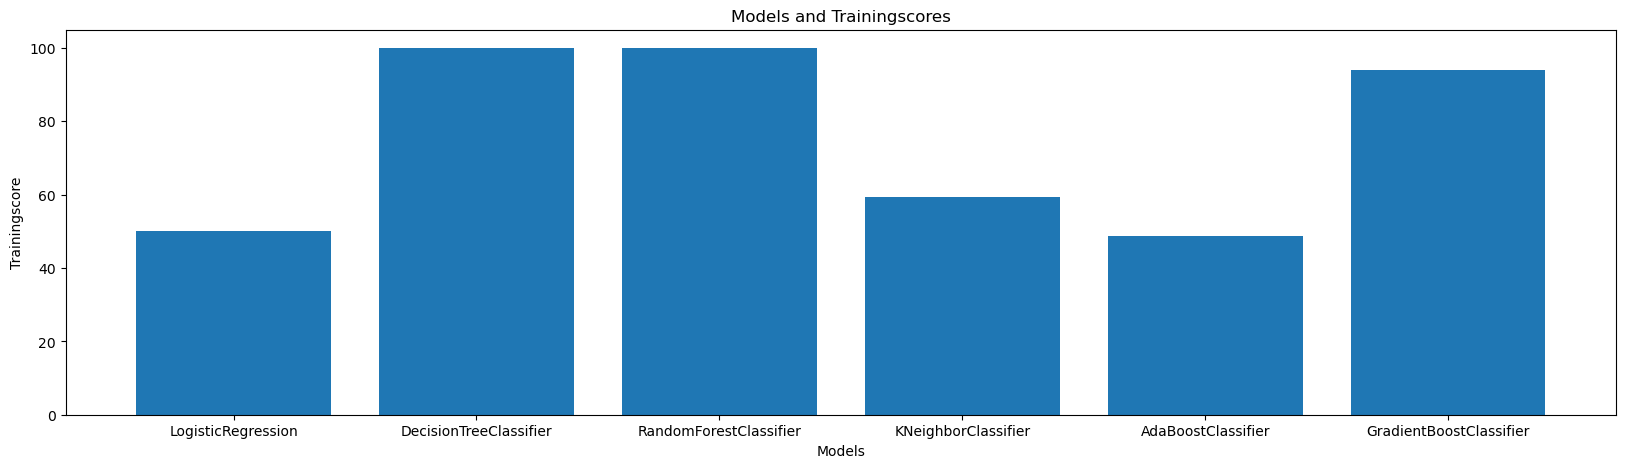

In [54]:
x=score.Model
y=score.TrainingScores
plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.xlabel('Models')
plt.ylabel('Trainingscore')
plt.title('Models and Trainingscores')
plt.show()

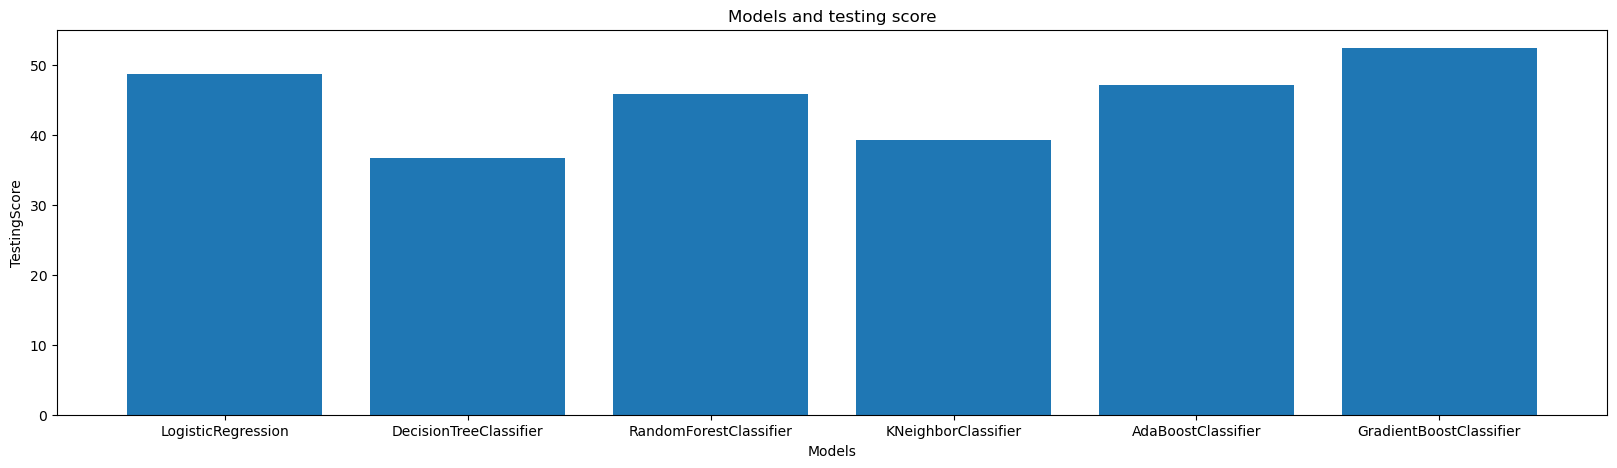

In [55]:
x=score.Model
y=score.TestingScore
plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.xlabel('Models')
plt.ylabel('TestingScore')
plt.title("Models and testing score")
plt.show()

In [56]:
dump(model5,'model.joblib')
loaded_model=load('model.joblib')

In [57]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model5, file)


with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
print(loaded_model.predict(xtest))

[3 2 0 ... 3 2 0]


In [58]:
import pickle
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(xtrain)     # fit on training features

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Scaler saved as scaler.pkl")


Scaler saved as scaler.pkl


In [59]:
print(type(x))
try:
    print("Columns:", x.columns.tolist())
    print("Total:", len(x.columns))
except:
    print("x has no columns. Show me this instead:")
    print(x.head())


<class 'pandas.core.series.Series'>
x has no columns. Show me this instead:
0        LogisticRegression
1    DecisionTreeClassifier
2    RandomForestClassifier
3       KNeighborClassifier
4        AdaBoostClassifier
Name: Model, dtype: object
